In [1]:
!pip install --upgrade langchain
!pip install langchain-community
!pip install langchain==0.2.17 langchain-community==0.2.19 langsmith==0.1.112
!pip install vaderSentiment


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-community 0.2.19 requires langchain<0.3.0,>=0.2.17, but you have langchain 0.3.11 which is incompatible.
langchain-community 0.2.19 requires langchain-core<0.3.0,>=0.2.43, but you have langchain-core 0.3.24 which is incompatible.
langchain-community 0.2.19 requires langsmith<0.2.0,>=0.1.112, but you have langsmith 0.2.3 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached langchain-0.3.11-py3-none-any.whl.metadata (7.1 kB)
  Using cached langchain_core-0.3.24-py3-none-any.whl.metadata (6.3 kB)
  Using cached langchain_text_splitters-0.3.2-py3-none-any.whl.metadata (2.3 kB)
  Using cached langsmith-0.2.3-py3-none-any.whl.metadata (14 kB)
Using cached langchain-0.3.11-py3-none-any.whl (1.0 MB)
Using cached langchain_core-0.3.24-py3-none-any.whl (410 kB)
Using cached langchain_text_splitters-0.3.2-py3-none-any.whl (25 kB)
Using cached langsmith-0.2.3-py3-none-any.whl (320 kB)
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.1.112
    Uninstalling langsmith-0.1.112:
      Successfully uninstalled langsmith-0.1.112
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.2.43
    Uninstalling langchain-core-0.2.43:
      Successfully uninstalled langchain-core-0.2.43
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.2.4
   


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached langsmith-0.1.112-py3-none-any.whl.metadata (13 kB)
Using cached langsmith-0.1.112-py3-none-any.whl (288 kB)
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.1.147
    Uninstalling langsmith-0.1.147:
      Successfully uninstalled langsmith-0.1.147



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Test imports
from matplotlib import pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from dotenv import load_dotenv
# If no errors, proceed to run the complete script.
print("All imports successful!")

All imports successful!


- Imports the `pandas` library for handling data.
- Specifies the absolute path to the CSV file.
- Attempts to load the dataset using `pd.read_csv` with:
  - `index_col=0`: Sets the first column as the index.
  - `encoding="ISO-8859-1"`: Handles non-UTF-8 characters in the file.
- Catches and handles two types of exceptions:
  1. `FileNotFoundError`: Indicates the file does not exist at the specified path.
  2. Generic exceptions: Captures any other errors (e.g., encoding issues).
- If successful, displays a random sample of 5 rows from the dataset using `df.sample(5)`.


In [5]:
import pandas as pd

# Absolute path to the dataset file
file_path = r"Combined Data.csv"

# Load the dataset with proper encoding
try:
    # Attempt reading the file with different encodings
    df = pd.read_csv(file_path, index_col=0, encoding="ISO-8859-1")  # Use ISO-8859-1 encoding for Windows files
    # Display a sample of the dataset
    print(df.sample(5))  # Display 5 random rows as a sample
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")



                                               statement       status
73956  You look so serene, as if the world has paused...         Calm
82723  I can tell you're thinking about the possibili...  Hopefulness
68220  Deadlines and responsibilities seem to be pili...       Stress
9357   She was my only friend, my best friend. The on...   Depression
67873  You're caught in a whirlwind of thoughts, aren...    Confusion


## Data Cleanup and Preparation

In [6]:
# Check for missing values. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100004 entries, 0 to 100000
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   statement  99639 non-null   object
 1   status     100000 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [7]:
# Null values in the statement column
df['statement'].notnull().value_counts()

statement
True     99639
False      365
Name: count, dtype: int64

In [8]:
# Drop null values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99638 entries, 0 to 100000
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  99638 non-null  object
 1   status     99638 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [9]:
# Get the number of different statuses in the status column:
status_count = df['status'].value_counts()
status_count

status
Normal                  16343
Depression              15404
Stress                  12067
Suicidal                10651
Calm                     9405
Hopefulness              9405
Excitement               9399
Confusion                9270
Anxiety                  3840
Bipolar                  2777
Personality disorder     1077
Name: count, dtype: int64

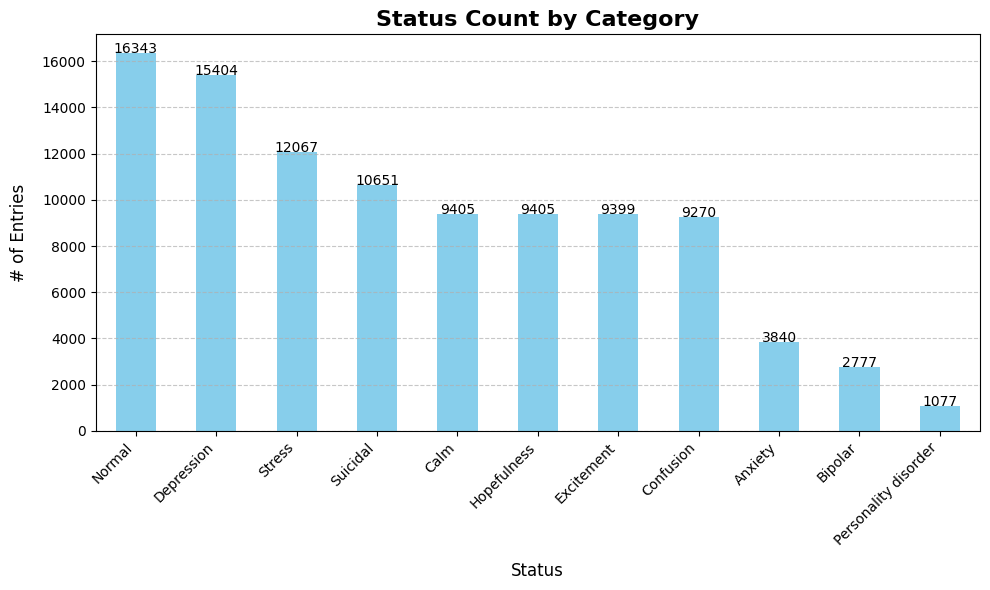

In [10]:
import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
status_chart = status_count.plot(
    kind='bar',
    color='skyblue',  # Use a more visually appealing color
    title='Status Count'
)

# Customize the chart
status_chart.set_title('Status Count by Category', fontsize=16, fontweight='bold')  # Update title styling
status_chart.set_xlabel('Status', fontsize=12, labelpad=10)  # Customize X-axis label
status_chart.set_ylabel('# of Entries', fontsize=12, labelpad=10)  # Customize Y-axis label
status_chart.set_xticklabels(status_count.index, rotation=45, ha='right', fontsize=10)  # Rotate and align X-axis labels

# Add gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels to the bars
for index, value in enumerate(status_count):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

# Display the chart
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


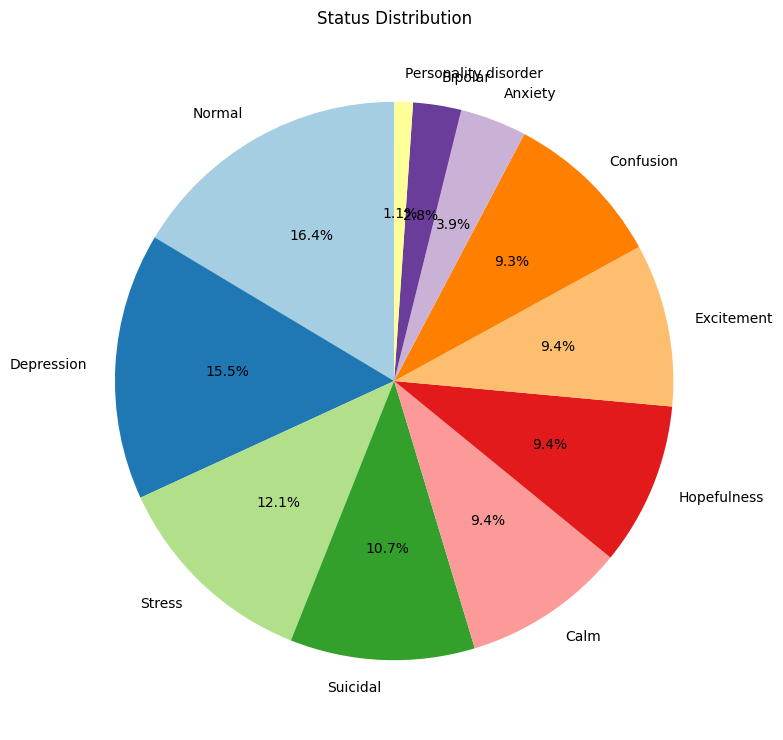

In [11]:
# Create a pie chart
plt.figure(figsize=(8, 8))
status_count.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    title="Status Distribution"
)
plt.ylabel("")  # Remove the default y-label
plt.tight_layout()
plt.show()


In [12]:
# Safely convert the 'statement' column to a list and save all sentences to a file
try:
    if 'statement' in df.columns:
        # Convert the column to a list
        statements = df['statement'].dropna().to_list()  # Drop NaN values
        print(f"Successfully converted 'statement' column to a list with {len(statements)} entries.\n")
        
        # Save all sentences to a text file
        output_file = "statements_output.txt"
        with open(output_file, "w", encoding="utf-8") as file:
            for idx, sentence in enumerate(statements, start=1):
                file.write(f"{idx}. {sentence}\n")
        print(f"All statements have been saved to {output_file}.")
    else:
        raise KeyError("The column 'statement' does not exist in the DataFrame.")
except Exception as e:
    print(f"An error occurred: {e}")


Successfully converted 'statement' column to a list with 99638 entries.

All statements have been saved to statements_output.txt.


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment of a single statement
def analyze_statement(statement):
    statement_sentiment = analyzer.polarity_scores(statement)
    compound_score = statement_sentiment['compound']
    
    # Determine sentiment
    if compound_score >= 0.05:
        return "Positive", compound_score
    elif compound_score <= -0.05:
        return "Negative", compound_score
    else:
        return "Neutral", compound_score

# Analyze sentiments for all statements
results = [analyze_statement(statement) for statement in statements]

# Extract sentiment and score into separate lists
sentiment, score = zip(*results)  # Unpack the tuple list into two separate lists



In [19]:
# Creating sentiment and score columns.
df['sentiment'] = sentiment
df['score'] = score
df.head()

,statement,status,sentiment,score
0,oh my gosh,Anxiety,Neutral,0.0000
1,"trouble sleeping, confused mind, restless hear...",Anxiety,Negative,-0.2263
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,Negative,-0.7351
3,I've shifted my focus to something else but I'...,Anxiety,Negative,-0.4215
4,"I'm restless and restless, it's been a month n...",Anxiety,Negative,-0.4939


In [20]:
# Displaying a sample of the new DataFrame.
df.sample(10)

,statement,status,sentiment,score
52896,Does anyone else experience Catalonia ? I have...,Anxiety,Negative,-0.5931
88567,This is the kind of moment that gets your hear...,Excitement,Positive,0.8016
3336,whose name is not very clear,Normal,Negative,-0.3401
49575,Nicotine relapse when hypomanic Iâm not sure...,Bipolar,Negative,-0.9746
90290,"Youre probably asking yourself, 'How does thi...",Confusion,Positive,0.1280
37870,i need friend i am so sad and lonely please help,Depression,Positive,0.1142
61976,Theres something about your demeanor that rad...,Hopefulness,Positive,0.8176
30781,i haven't heard anything about it.,Normal,Neutral,0.0000
41968,http twitpic com y e cant see the flower falli...,Normal,Negative,-0.1531
27960,So many local counties and cities struggle wit...,Normal,Positive,0.8885


In [21]:
# Get the number of different results in the sentiment column:
sentiment_count = df['sentiment'].value_counts()
sentiment_count

sentiment
Positive    58009
Negative    35114
Neutral      6515
Name: count, dtype: int64

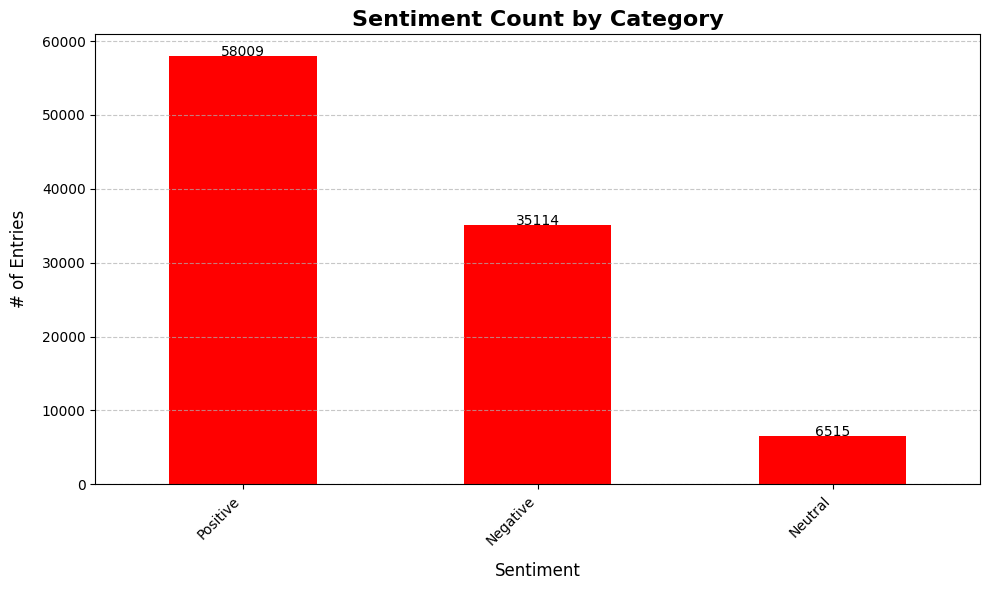

In [22]:
import matplotlib.pyplot as plt

# Create the bar chart with improved aesthetics
plt.figure(figsize=(10, 6))  # Set figure size for better readability
sentiment_chart = sentiment_count.plot(
    kind='bar',
    color='red',  # Use a visually appealing color
    title='Sentiment Count'
)

# Customize the chart
sentiment_chart.set_title('Sentiment Count by Category', fontsize=16, fontweight='bold')  # Update title styling
sentiment_chart.set_xlabel('Sentiment', fontsize=12, labelpad=10)  # Customize X-axis label
sentiment_chart.set_ylabel('# of Entries', fontsize=12, labelpad=10)  # Customize Y-axis label
sentiment_chart.set_xticklabels(sentiment_count.index, rotation=45, ha='right', fontsize=10)  # Rotate and align X-axis labels

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels to each bar
for index, value in enumerate(sentiment_count):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

# Display the chart
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [23]:
# Set the features variable.
X = df['statement']
# Set the target variables.
y_status = df['status']
y_sentiment = df['sentiment']

In [35]:
# Split data into training and testing for status
X_status_train, X_status_test, y_status_train, y_stauts_test = train_test_split(X, y_status, test_size=0.25, random_state=1)

In [28]:
# Split data into training and testing for sentiment
X_sentiment_train, X_sentiment_test, y_sentiment_train, y_sentiment_test = train_test_split(X, y_sentiment, test_size=0.30, random_state=1)

## ML Model using RandomForestClassifier

In [39]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cm, class_names, title='Confusion Matrix'):
    """
    Create a detailed, visually appealing confusion matrix heatmap.
    
    Parameters:
    - cm: Confusion matrix (numpy array)
    - class_names: List of class labels
    - title: Title of the confusion matrix
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names, cbar_kws={'label': 'Number of Predictions'})
    plt.title(title, fontsize=16)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def train_and_evaluate_model1(X_train, y_train, X_test, y_test, pipeline_name='default', stop_words=None):
    """
    Train and evaluate a classification model using a TF-IDF Vectorizer and RandomForestClassifier.
    
    Parameters:
    - X_train: Training features (list or DataFrame)
    - y_train: Training labels (list or Series)
    - X_test: Test features (list or DataFrame)
    - y_test: Test labels (list or Series)
    - stop_words: Stop words to use in the TfidfVectorizer ('english', None, or custom list of stop words)
    - pipeline_name: A label to distinguish between different pipelines for tracking/logging purposes
    
    Returns:
    - model: The trained pipeline model
    - predictions: Predictions on the test set
    - metrics: A dictionary containing training accuracy, testing accuracy, and overall accuracy
    """
    print(f"\n--- Starting Training and Evaluation for {pipeline_name} ---\n")
    # Step 1: Create the pipeline with stop words parameter
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words=stop_words)),
        ('classifier', RandomForestClassifier())
    ])
    
    # Step 2: Train the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Step 3: Make predictions on the test data
    predictions = pipeline.predict(X_test)
    print(f"{pipeline_name} - Predictions:\n", predictions)
    
    # Step 4: Show the test data, predicted labels, and actual labels
    test_results = pd.DataFrame({'X_test': X_test, 'Predicted_y': predictions, 'Actual_y': y_test})
    print(f"{pipeline_name} - Test Results:\n", test_results)
    
    # Step 5: Calculate training and testing accuracy
    training_accuracy = pipeline.score(X_train, y_train)
    testing_accuracy = pipeline.score(X_test, y_test)
    print(f"{pipeline_name} - Training Accuracy:", training_accuracy)
    print(f"{pipeline_name} - Testing Accuracy:", testing_accuracy)
    
    # Step 6: Create and print the confusion matrix
    confusion_mat = confusion_matrix(y_test, predictions)
    print(f"{pipeline_name} - Confusion Matrix:\n", confusion_mat)
    
    # Step 7: Print the classification report
    class_report = classification_report(y_test, predictions)
    print(f"{pipeline_name} - Classification Report:\n", class_report)
    
    # Step 8: Calculate and print the overall accuracy
    overall_accuracy = accuracy_score(y_test, predictions)
    print(f"{pipeline_name} - Overall Accuracy:", overall_accuracy)
    
    # Step 9: Plot the confusion matrix
    plot_confusion_matrix(confusion_mat, pipeline.named_steps['classifier'].classes_, title=f'{pipeline_name} Confusion Matrix')
    
    # Step 10: Store evaluation metrics in a dictionary
    metrics = {
        'training_accuracy': training_accuracy,
        'testing_accuracy': testing_accuracy,
        'overall_accuracy': overall_accuracy,
        'confusion_matrix': confusion_mat,
        'classification_report': class_report
    }
    return pipeline, predictions, metrics



--- Starting Training and Evaluation for Status Classification ---

Status Classification - Predictions:
 ['Depression' 'Normal' 'Depression' ... 'Excitement' 'Normal' 'Excitement']
Status Classification - Test Results:
                                                   X_test  ...     Actual_y
39818  i cant bear not being beatiful im a man not gi...  ...   Depression
27819  The gist of the comments received was the K is...  ...       Normal
22262  I can keep my hygiene up and cook and clean th...  ...     Suicidal
5965                    wow. what is this thing going on  ...       Normal
62331  You look so serene, as if the world has paused...  ...         Calm
...                                                  ...  ...          ...
13017  So my wifes leaving me I will not give details...  ...   Depression
91164  I can tell you're thinking about the possibili...  ...  Hopefulness
58422  You can feel the pulse of excitement, cant yo...  ...   Excitement
43593  i think my email doma

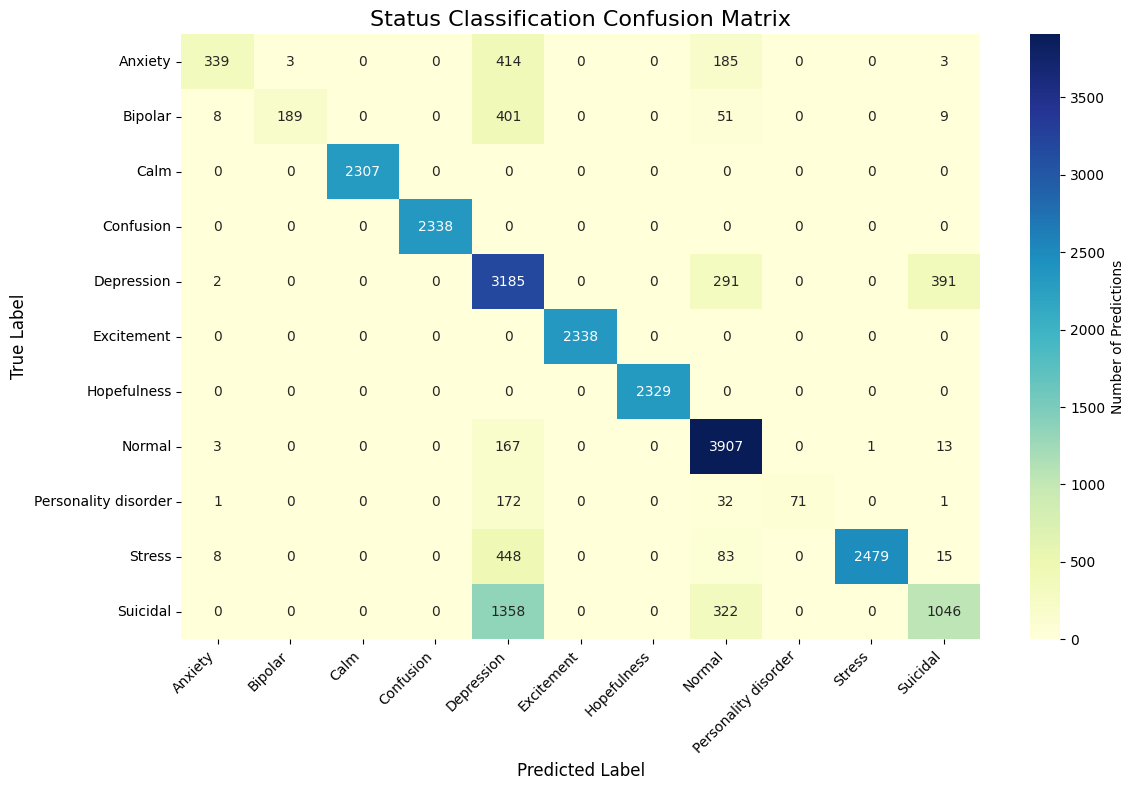

In [42]:
status_results = train_and_evaluate_model1(
    X_train=X_status_train, 
    y_train=y_status_train, 
    X_test=X_status_test, 
    y_test=y_stauts_test, 
    pipeline_name="Status Classification", 
)

Title: y_sentiment_train


--- Starting Training and Evaluation for Sentiment Analysis ---

Sentiment Analysis - Predictions:
 ['Negative' 'Negative' 'Negative' ... 'Negative' 'Negative' 'Positive']
Sentiment Analysis - Test Results:
                                                   X_test Predicted_y  Actual_y
39818  i cant bear not being beatiful im a man not gi...    Negative  Positive
27819  The gist of the comments received was the K is...    Negative  Positive
22262  I can keep my hygiene up and cook and clean th...    Negative  Positive
5965                    wow. what is this thing going on     Neutral  Positive
62331  You look so serene, as if the world has paused...    Positive  Positive
...                                                  ...         ...       ...
32828             they could even crack their head open.     Neutral   Neutral
29109  And I woke up. It took 3 nurses and some sort ...    Negative  Positive
13752  My mom told me to take the trash out but I am ...    Negative  Negative
3

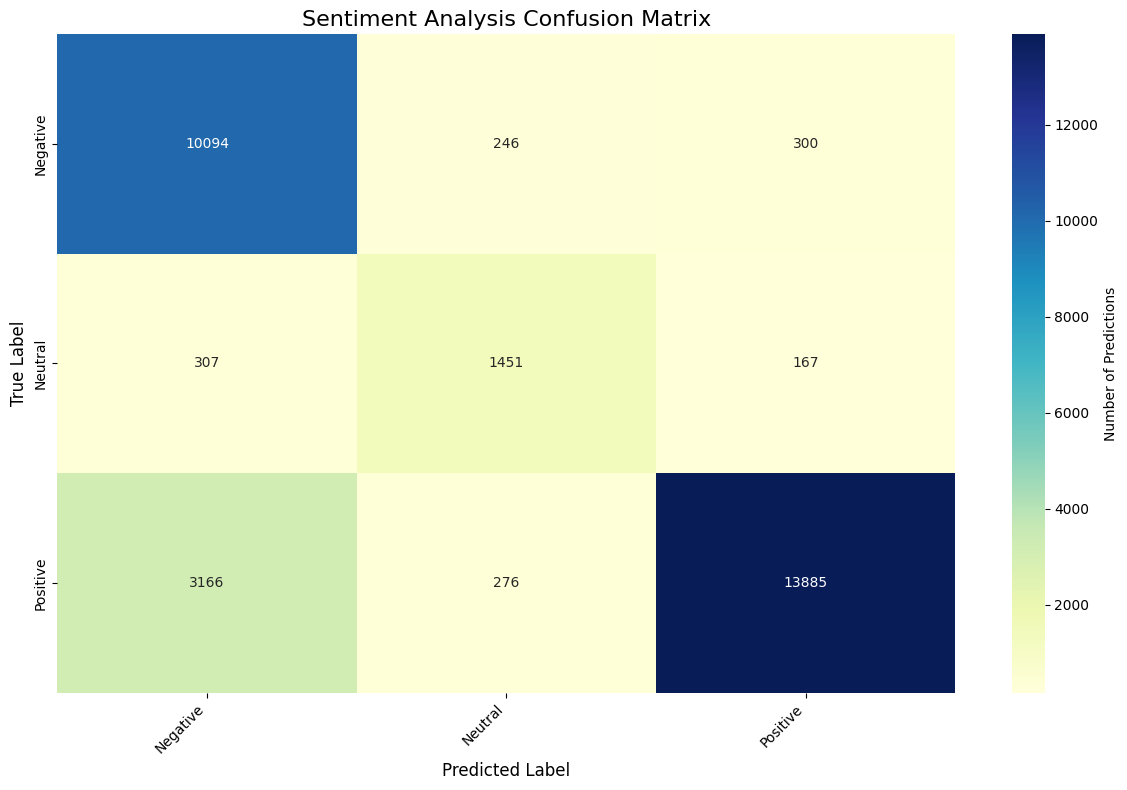

In [43]:
# 2
# Sentiment analysis data
sentiment_results = train_and_evaluate_model1(
    X_train=X_sentiment_train, 
    y_train=y_sentiment_train, 
    X_test=X_sentiment_test, 
    y_test=y_sentiment_test, 
    pipeline_name="Sentiment Analysis", 
)

Training results of RandomForestClassifier with Stopwords

In [ ]:
# 3
# Call the function with your training and testing data
status_results_stopwords = train_and_evaluate_model1(
    X_train=X_status_train, 
    y_train=y_status_train, 
    X_test=X_status_test, 
    y_test=y_stauts_test,
    pipeline_name="Status Classification with Stop Words",
    stop_words='english'
)



--- Starting Training and Evaluation for Status Classification with Stop Words ---



In [23]:
#  4 sentiment analysis with stop words
sentiment_results_stopwords = train_and_evaluate_model1(
    X_train=X_sentiment_train, 
    y_train=y_sentiment_train, 
    X_test=X_sentiment_test, 
    y_test=y_sentiment_test, 
    pipeline_name="Sentiment Analysis Stop_Words", 
    dual_param='auto',
    stop_words='english'
)


--- Starting Training and Evaluation for Sentiment Analysis Stop_Words ---



c:\Users\shubdosh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Sentiment Analysis Stop_Words - Predictions:
 ['Positive' 'Positive' 'Positive' ... 'Negative' 'Negative' 'Positive']
Sentiment Analysis Stop_Words - Test Results:
                                                   X_test Predicted_y  Actual_y
39818  i cant bear not being beatiful im a man not gi...    Positive  Positive
27819  The gist of the comments received was the K is...    Positive  Positive
22262  I can keep my hygiene up and cook and clean th...    Positive  Positive
5965                    wow. what is this thing going on    Positive  Positive
62331  You look so serene, as if the world has paused...    Positive  Positive
...                                                  ...         ...       ...
32828             they could even crack their head open.    Positive   Neutral
29109  And I woke up. It took 3 nurses and some sort ...     Neutral  Positive
13752  My mom told me to take the trash out but I am ...    Negative  Negative
35469  I can see and feel my (groin) inguinal